In [ ]:
!pip install -U lightgbm

In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import ast


import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def plot_histogram(df, variable):
    sns.histplot(df[variable], kde=True)

    plt.title(f"Histogram of the distribution of a continuous variable {variable}")
    plt.xlabel('value')
    plt.ylabel('counts')

    plt.show()

In [ ]:
# Function to get word vectors
def get_word_vector(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return np.zeros(word_vectors.vector_size)  # Return zero vector for out-of-vocabulary words

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/wines_processed/wines.csv', )
# df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.sample(5)

,style_name,price,currency,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,wine_name,rating,region_name,country,winery,image,combined_reviews,flavours
16903,Grüner Veltliner,18.990000,USD,750,NaN,NaN,NaN,NaN,NaN,NaN,Weis Vineyards Grüner Veltliner U.V.,4.2,Finger Lakes,United States,Weis Vineyards,//images.vivino.com/labels/a-fS8OHyTQu9EGGXai2...,"SEP High acid. Yellow apple, pear SEP tart and...","['yellow apple', 'pear']"
4874,Monterey County Pinot Noir,19.890000,USD,750,3.436226,NaN,1.606624,2.132160,41.0,78.0,Angels Ink Monterey County Pinot Noir U.V.,4.5,Monterey County,United States,Angels Ink,//images.vivino.com/thumbs/ix7PQPGEQpG8QC6ShIa...,SEP I would say mild tannins nicely structured...,"['cherry', 'cranberry', 'cloves', 'dark fruit'..."
1127,Ungrafted Grave Soils Carménère,22.083333,USD,750,2.619505,NaN,1.568515,2.801188,6.0,1.0,De Martino Ungrafted Grave Soils Carménère U.V.,4.5,Maipo Valley,Chile,De Martino,//images.vivino.com/labels/qB7kplqFRb-pJlvlKya...,SEP Medium body. Complex flavors. Equal cherry...,[]
23803,Riesling,19.916667,USD,750,4.014608,NaN,1.800853,NaN,99.0,1156.0,Eroica Riesling U.V.,4.0,Columbia Valley,United States,Eroica,//images.vivino.com/thumbs/FduTxIu1Txe08CMqlo6...,"SEP Floral nose, great balance of minerality a...","['minerality', 'stone', 'stone fruit']"
3491,Appellation Series Chardonnay,23.832500,USD,750,3.295849,NaN,2.445660,NaN,3.0,1.0,Wines from Hahn Estate Appellation Series Char...,4.2,Arroyo Seco,United States,Wines from Hahn Estate,//images.vivino.com/labels/95NGwE_7To-VIQJTxFP...,"SEP Loved it. Acidic, white chocolate, and tar...","['pear', 'oaky', 'green apple']"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26825 entries, 0 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  26825 non-null  object 
 1   price                       26825 non-null  float64
 2   currency                    26825 non-null  object 
 3   volume                      26825 non-null  int64  
 4   acidity                     24937 non-null  float64
 5   fizziness                   451 non-null    float64
 6   sweetness                   24486 non-null  float64
 7   tannin                      14379 non-null  float64
 8   user_structure_count        24937 non-null  float64
 9   calculated_structure_count  24937 non-null  float64
 10  wine_name                   26825 non-null  object 
 11  rating                      26825 non-null  float64
 12  region_name                 26825 non-null  object 
 13  country                     268

In [ ]:
df.fizziness.unique()

array([      nan, 4.0050497, 1.2505455, 1.1849563, 3.8628569, 4.0755954,
       1.       , 1.097399 , 3.5      , 1.0457354, 1.068984 , 2.1307707,
       1.0286934, 1.0413214, 3.981688 , 3.8822222, 1.1135762, 4.6054497,
       1.1033229, 3.7645772, 4.179432 , 3.8794117, 3.7783637, 4.79866  ,
       4.110244 , 4.965238 , 1.227052 , 1.0542755, 1.023203 , 3.4173982,
       1.0870681, 2.5953875, 1.0220032, 3.6337748, 3.9741912, 3.962222 ,
       3.5961773, 1.0561794, 1.116563 , 3.8786721, 3.973896 , 1.2429646,
       3.6614583, 4.       , 4.0243397, 3.9519048, 1.1911764, 4.036923 ,
       1.0132576, 1.1783885, 1.127237 , 3.25     , 1.1453573, 3.9188387,
       1.2065349, 1.1015396, 1.0491054, 3.7166667, 3.9207032, 1.0935078,
       3.9494493, 3.8826115, 3.9697604, 3.9112766, 3.9517882, 3.9038079,
       1.0858586, 3.7779586, 3.7740824, 3.862923 , 3.9804878, 3.9637809,
       3.8847458, 3.782    , 1.1698785, 3.8006368, 1.1361648, 3.8949032,
       1.0466292, 3.793419 , 3.9539762, 3.7238097, 

In [ ]:
df.fizziness = df.fizziness.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26825 entries, 0 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  26825 non-null  object 
 1   price                       26825 non-null  float64
 2   currency                    26825 non-null  object 
 3   volume                      26825 non-null  int64  
 4   acidity                     24937 non-null  float64
 5   fizziness                   26825 non-null  float64
 6   sweetness                   24486 non-null  float64
 7   tannin                      14379 non-null  float64
 8   user_structure_count        24937 non-null  float64
 9   calculated_structure_count  24937 non-null  float64
 10  wine_name                   26825 non-null  object 
 11  rating                      26825 non-null  float64
 12  region_name                 26825 non-null  object 
 13  country                     268

In [ ]:
df.describe()

,price,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,rating
count,26825.000000,26825.000000,24937.000000,26825.000000,24486.000000,14379.000000,24937.000000,24937.000000,26825.000000
mean,24.146525,747.260019,3.404173,0.050944,1.864479,3.093038,62.669046,125.370333,4.086837
std,4.557660,31.974264,0.639423,0.412810,0.754787,0.600516,284.137408,412.053915,0.451426
min,4.990000,375.000000,1.378824,0.000000,1.000000,1.368427,0.000000,0.000000,1.000000
25%,19.990000,750.000000,3.000000,0.000000,1.422000,2.801188,2.000000,6.000000,4.000000
50%,24.990000,750.000000,3.381946,0.000000,1.662057,3.193358,10.000000,30.000000,4.000000
75%,27.990000,750.000000,3.908907,0.000000,2.021250,3.407533,41.000000,93.000000,4.400000
max,30.000000,1000.000000,5.000000,4.965238,5.000000,4.691349,10940.000000,19037.000000,5.000000


Categorical variables

In [ ]:
df.style_name.nunique()/len(df)

0.05181733457595526

In [ ]:
df.country.nunique()

30

In [ ]:
df.acidity = df.acidity.fillna(df.acidity.median())
df.sweetness = df.sweetness.fillna(df.sweetness.median())

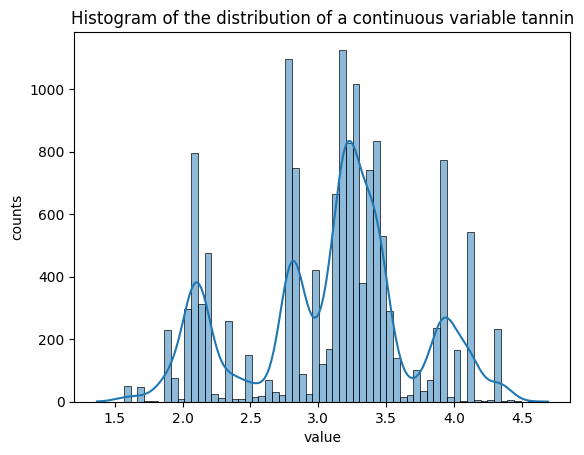

In [ ]:
plot_histogram(df, 'tannin')

Model that fills NaN in tanin column

In [ ]:
df_tanin = df

In [ ]:
df_tanin = df_tanin.dropna(subset=['calculated_structure_count'])
df_tanin = df_tanin.dropna(subset=['tannin'])

In [ ]:
df_tanin.describe()

,price,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,rating
count,14379.000000,14379.000000,14379.000000,14379.0,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000
mean,24.434341,749.713123,3.279096,0.0,1.689399,3.093038,95.520481,174.001808,4.139808
std,4.399124,10.368411,0.586710,0.0,0.357118,0.600516,363.035541,514.121811,0.386996
min,4.990000,375.000000,1.527302,0.0,1.000000,1.368427,0.000000,0.000000,1.000000
25%,20.415833,750.000000,2.984349,0.0,1.481206,2.801188,7.000000,6.000000,4.000000
50%,24.990000,750.000000,3.246583,0.0,1.652857,3.193358,25.000000,62.000000,4.000000
75%,27.990000,750.000000,3.708609,0.0,1.776645,3.407533,66.000000,102.000000,4.400000
max,30.000000,750.000000,5.000000,0.0,3.401099,4.691349,10940.000000,19037.000000,5.000000


In [ ]:
df_tanin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14379 entries, 2 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  14379 non-null  object 
 1   price                       14379 non-null  float64
 2   currency                    14379 non-null  object 
 3   volume                      14379 non-null  int64  
 4   acidity                     14379 non-null  float64
 5   fizziness                   14379 non-null  float64
 6   sweetness                   14379 non-null  float64
 7   tannin                      14379 non-null  float64
 8   user_structure_count        14379 non-null  float64
 9   calculated_structure_count  14379 non-null  float64
 10  wine_name                   14379 non-null  object 
 11  rating                      14379 non-null  float64
 12  region_name                 14379 non-null  object 
 13  country                     143

In [ ]:
X = df_tanin[['price',	'volume', 'acidity', 'fizziness', 'sweetness',	'user_structure_count',	'calculated_structure_count', 'rating']]
y = df_tanin['tannin']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (9202, 8)
X_test: (2301, 8)
y_train: (9202,)
y_test: (2301,)


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)


y_pred_poly = model_poly.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Średni błąd kwadratowy (MSE) dla regresji wielomianowej: {mse_poly}")

Średni błąd kwadratowy (MSE) dla regresji wielomianowej: 0.2887404256648867


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Test predictions
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Średni błąd kwadratowy (MSE) dla lasu losowego: {mse_rf}")

Średni błąd kwadratowy (MSE) dla lasu losowego: 0.025278407446702837


In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'regression', 
    'metric': 'l2', 
    'num_leaves': 31, 
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8, 
    'bagging_freq': 5,
    'verbose': 0
}

num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data]) #early_stopping_rounds=10,verbose_eval=False

y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)

mse = mean_squared_error(y_val, y_pred)
print(f"Średni błąd kwadratowy (MSE) na zbiorze walidacyjnym: {mse}")

Średni błąd kwadratowy (MSE) na zbiorze walidacyjnym: 0.013806406035132463


In [ ]:
missing_tanin_rows = df[df['tannin'].isnull()]

In [ ]:
missing_tanin_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12446 entries, 0 to 26821
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  12446 non-null  object 
 1   price                       12446 non-null  float64
 2   currency                    12446 non-null  object 
 3   volume                      12446 non-null  int64  
 4   acidity                     12446 non-null  float64
 5   fizziness                   12446 non-null  float64
 6   sweetness                   12446 non-null  float64
 7   tannin                      0 non-null      float64
 8   user_structure_count        10558 non-null  float64
 9   calculated_structure_count  10558 non-null  float64
 10  wine_name                   12446 non-null  object 
 11  rating                      12446 non-null  float64
 12  region_name                 12446 non-null  object 
 13  country                     124

In [ ]:
missing_tanin_rows.head()

,style_name,price,currency,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,wine_name,rating,region_name,country,winery,image,combined_reviews,flavours
0,Moscato,12.990000,USD,750,3.067054,0.0,3.271635,NaN,18.0,192.0,Seven Daughters Moscato U.V.,4.1,Veneto,Italy,Seven Daughters,//images.vivino.com/thumbs/mE6S9dUrSUOFI8qTodT...,SEP Wow I was incredibly taken back by this mo...,"['lychee', 'minerals', 'white peach', 'apple',..."
1,Indisciplinato,27.990000,USD,750,3.442514,0.0,1.623086,NaN,9.0,1.0,Tenuta San Marcello Indisciplinato U.V.,2.5,Marche,Italy,Tenuta San Marcello,//images.vivino.com/labels/kJVZn2JsRiiUc7Xfz7x...,"SEP Anfora verdicchio, not satisfied, for the ...","['dried mango', 'orange']"
5,Riesling Semi-Dry,22.666667,USD,750,4.831417,0.0,2.727495,NaN,9.0,84.0,Hermann J. Wiemer Riesling Semi-Dry U.V.,4.0,Seneca Lake,United States,Hermann J. Wiemer,//images.vivino.com/thumbs/oMF18VvWR7-lVbDXzwl...,SEP Great value \nPetrol lemon mango mango man...,"['cheese', 'lemon', 'mango', 'stone', 'tropica..."
6,The Insider Chardonnay,24.332500,USD,750,2.614286,0.0,2.178571,NaN,0.0,5.0,Vinum Cellars The Insider Chardonnay U.V.,4.0,Los Carneros,United States,Vinum Cellars,//images.vivino.com/thumbs/KZoPR_OhQ5uRNHb4DdO...,SEP With staff in Orlando. SEP a not awful ca...,"['apricot', 'coconut', 'cream', 'mango', 'trop..."
8,Parcella 602 Sauvignon,29.990000,USD,750,3.210974,0.0,1.929204,NaN,12.0,2.0,Iparcellari Parcella 602 Sauvignon U.V.,3.9,Piemonte,Italy,Iparcellari,//images.vivino.com/thumbs/bl9A5GhlSEGnUQXY3ND...,"SEP Vanilla in nose. Apple, citrus and honey m...","['oaky', 'vanilla', 'apple', 'citrus', 'honey'..."


In [ ]:
df_new = df

In [ ]:
predicted_tanin_values = missing_tanin_rows.apply(lambda row: bst.predict(row[['price', 'volume', 'acidity', 'fizziness', 'sweetness', 'user_structure_count', 'calculated_structure_count', 'rating']].values.reshape(1, -1))[0], axis=1)
predicted_tanin_values.index = missing_tanin_rows.index
df_new['tannin'].fillna(predicted_tanin_values, inplace=True)

In [ ]:
df_new['tannin'][0]

3.110630887920601

In [ ]:
df_new.describe()

,price,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,rating
count,26825.000000,26825.000000,26825.000000,26825.000000,26825.000000,26825.000000,24937.000000,24937.000000,26825.000000
mean,24.146525,747.260019,3.402608,0.050944,1.846828,3.115711,62.669046,125.370333,4.086837
std,4.557660,31.974264,0.616536,0.412810,0.723386,0.538954,284.137408,412.053915,0.451426
min,4.990000,375.000000,1.378824,0.000000,1.000000,1.368427,0.000000,0.000000,1.000000
25%,19.990000,750.000000,3.014801,0.000000,1.472440,2.801188,2.000000,6.000000,4.000000
50%,24.990000,750.000000,3.381946,0.000000,1.662057,3.179357,10.000000,30.000000,4.000000
75%,27.990000,750.000000,3.889194,0.000000,1.939892,3.414762,41.000000,93.000000,4.400000
max,30.000000,1000.000000,5.000000,4.965238,5.000000,4.691349,10940.000000,19037.000000,5.000000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26825 entries, 0 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  26825 non-null  object 
 1   price                       26825 non-null  float64
 2   currency                    26825 non-null  object 
 3   volume                      26825 non-null  int64  
 4   acidity                     26825 non-null  float64
 5   fizziness                   26825 non-null  float64
 6   sweetness                   26825 non-null  float64
 7   tannin                      26825 non-null  float64
 8   user_structure_count        24937 non-null  float64
 9   calculated_structure_count  24937 non-null  float64
 10  wine_name                   26825 non-null  object 
 11  rating                      26825 non-null  float64
 12  region_name                 26825 non-null  object 
 13  country                     268

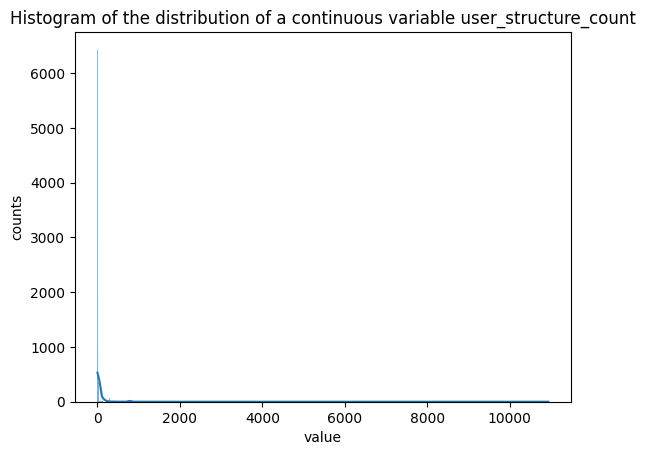

In [ ]:
plot_histogram(df_new, 'user_structure_count')

In [ ]:
df_new['user_structure_count'] = df_new['user_structure_count'].fillna(0)

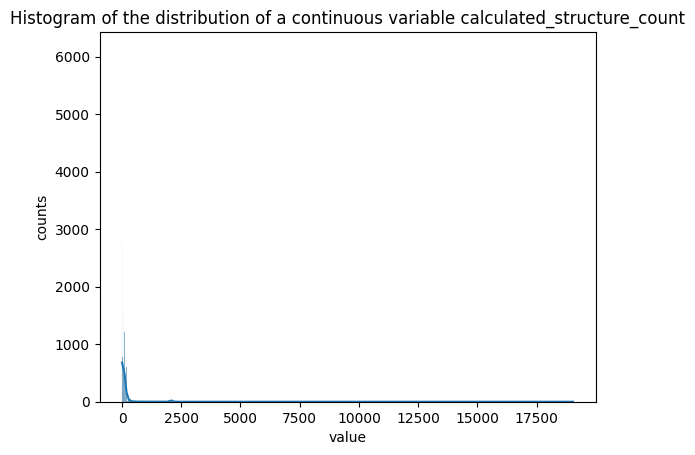

In [ ]:
plot_histogram(df_new, 'calculated_structure_count')

In [ ]:
df_new['calculated_structure_count'] = df_new['calculated_structure_count'].fillna(0)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26825 entries, 0 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  26825 non-null  object 
 1   price                       26825 non-null  float64
 2   currency                    26825 non-null  object 
 3   volume                      26825 non-null  int64  
 4   acidity                     26825 non-null  float64
 5   fizziness                   26825 non-null  float64
 6   sweetness                   26825 non-null  float64
 7   tannin                      26825 non-null  float64
 8   user_structure_count        26825 non-null  float64
 9   calculated_structure_count  26825 non-null  float64
 10  wine_name                   26825 non-null  object 
 11  rating                      26825 non-null  float64
 12  region_name                 26825 non-null  object 
 13  country                     268

In [ ]:
df_new.sample(10)

,style_name,price,currency,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,wine_name,rating,region_name,country,winery,image,combined_reviews,flavours
12024,Rosé,25.990000,USD,750,3.530986,0.0,1.169437,4.073909,0.0,12.0,Blanville Rosé U.V.,2.5,Pays d'Oc,France,Blanville,//images.vivino.com/thumbs/uh4pVWj7TryoTqVLOuE...,SEP Not very flavorful. This rosé has notes of...,['strawberry']
8242,Appellation Series Chardonnay,23.832500,USD,750,3.295849,0.0,2.445660,3.420416,3.0,1.0,Wines from Hahn Estate Appellation Series Char...,4.2,Arroyo Seco,United States,Wines from Hahn Estate,//images.vivino.com/labels/95NGwE_7To-VIQJTxFP...,"SEP Loved it. Acidic, white chocolate, and tar...","['pear', 'oaky', 'green apple']"
7616,Sancerre Blanc,27.990000,USD,750,4.032598,0.0,1.389476,2.604097,30.0,105.0,Michel Thomas & Fils Sancerre Blanc U.V.,4.0,Sancerre,France,Michel Thomas & Fils,//images.vivino.com/thumbs/eCps1ueZRkKbJ1BFSDa...,"SEP 3.8 pts\nFresh-cut grass, lemon and wet st...","['minerality', 'stone', 'chalk', 'citrus zest'..."
15,Pinot Noir,26.990000,USD,750,3.491437,0.0,1.682931,1.915690,7.0,7.0,The Calling Pinot Noir U.V.,4.1,Monterey County,United States,The Calling,//images.vivino.com/labels/9CrxfH8WRWSZ5gu2GwR...,"SEP Great body, fantastic length. Earthy tones...","['strawberry', 'cherry', 'earthy', 'pepper', '..."
11192,Appellation Series Chardonnay,23.832500,USD,750,3.295849,0.0,2.445660,3.420416,3.0,1.0,Wines from Hahn Estate Appellation Series Char...,4.2,Arroyo Seco,United States,Wines from Hahn Estate,//images.vivino.com/labels/95NGwE_7To-VIQJTxFP...,"SEP Loved it. Acidic, white chocolate, and tar...","['pear', 'oaky', 'green apple']"
7246,Sauvignon Blanc,29.990000,USD,750,3.996899,0.0,1.322857,3.317838,8.0,22.0,ZD Wines Sauvignon Blanc U.V.,4.4,Napa Valley,United States,ZD Wines,//images.vivino.com/thumbs/WqWp1nA0T1WI_h7Soa9...,SEP One of my favorite SBs. Simple enough to q...,"['green apple', 'apricot', 'pear']"
17386,Cabernet Sauvignon,25.666667,USD,750,3.990714,0.0,1.723643,3.930268,7.0,72.0,Big Flower Cabernet Sauvignon U.V.,4.0,Stellenbosch,South Africa,Big Flower,//images.vivino.com/thumbs/wV36ku8vS3OTId0Nqnh...,"SEP Great Cabernet. Very tannic with bramble, ...","['tobacco', 'blackberry', 'oaky', 'plum', 'smo..."
426,Cinsault Rosé,19.990000,USD,750,3.396163,0.0,2.494884,3.163176,2.0,10.0,Michael David Winery Cinsault Rosé U.V.,4.0,Lodi,United States,Michael David Winery,//images.vivino.com/labels/NeLmzRe3TrCG99homYx...,SEP Wife enjoyed this supermarket sample and c...,"['lemon', 'strawberries', 'watermelon', 'water..."
2331,Feliz Creek Vineyard Cabernet Sauvignon,19.990000,USD,750,2.961994,0.0,1.642386,3.407533,30.0,25.0,The Seventy Five Wine Company (Est. 75) Feliz ...,4.1,Mendocino County,United States,The Seventy Five Wine Company (Est. 75),//images.vivino.com/thumbs/VRY15rozR0infWImqak...,SEP Very good value for $20 at grocery store. ...,[]
17114,Riesling Semi-Dry,19.990000,USD,750,4.831417,0.0,2.727495,2.256204,9.0,84.0,Hermann J. Wiemer Riesling Semi-Dry U.V.,4.0,Seneca Lake,United States,Hermann J. Wiemer,//images.vivino.com/thumbs/oMF18VvWR7-lVbDXzwl...,SEP Great value \nPetrol lemon mango mango man...,"['cheese', 'lemon', 'mango', 'stone', 'tropica..."


## Categorical variables

In [ ]:
df_new['style_name'].nunique()

1390

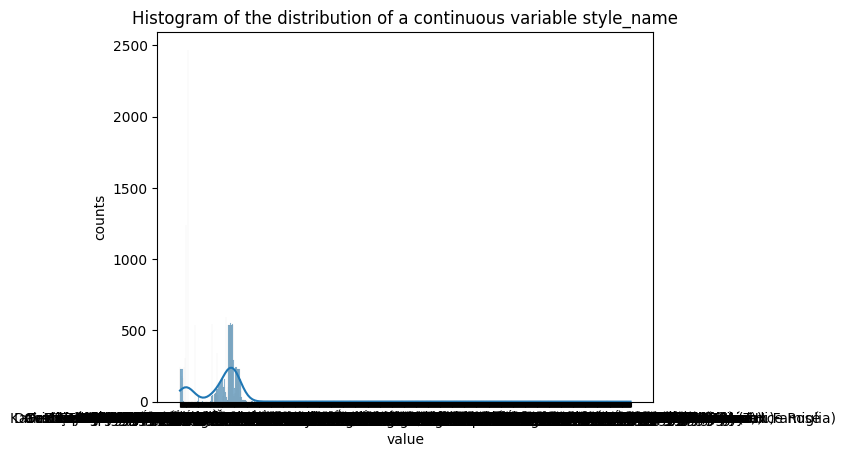

In [ ]:
plot_histogram(df_new, 'style_name')

In [ ]:
value_counts = df_new['style_name'].value_counts()

In [ ]:
selected_values = value_counts[value_counts <= 3].index.tolist()

print(selected_values)

['Reserve Pinot Noir', 'Taureau Y3', 'Russian River Valley Chardonnay', 'Salt River Sauvignon Blanc', 'Amarone della Valpolicella Classico', 'Reserve Chardonnay', 'Modus Toscana', 'Negroamaro Salento Calafuria Rosato', 'Lucente', 'Amarone della Valpolicella', "Barbera d'Alba Superiore", 'Chablis', 'Albariño', 'Appellation La Consulta Malbec', 'Sauvignon', 'Prosecco', 'Solosole Vermentino', 'Chardonnay (VIII)', 'Vignoles', 'Estate Pinot Noir', 'Rosso di Montalcino', 'De Nit', 'Rosé of Gamay Arroyo Seco', 'Amendment XXI', "La Rosa Selvatica Moscato d'Asti", 'Les Planels', 'Electra Red (California Moscato)', 'Glou Glou', "Montepulciano d'Abruzzo Riserva", 'Gran Reserva', 'Duas Quintas Tinto', 'Eight Spur Zinfandel', 'Tower Road Petite Sirah', 'Valpolicella Ripasso Superiore', 'Bordeaux Supérieur', 'Rouge', 'Hilltop Cabernet Sauvignon', 'Nouveau Old Vines', 'Sauvignon Blanc Te Muna Road Vineyard', 'Earthquake Zinfandel', 'Malvasia Volcánica Seco', 'Monte Lune Côtes-du-Rhône', 'Claret', 'Ro

In [ ]:
common_values = value_counts[value_counts > 3].index.tolist()

In [ ]:
print(common_values)

['Cabernet Sauvignon', 'Sauvignon Blanc', 'Rosé', 'Reserve Cabernet Sauvignon', 'Cuvée des Templiers Vacqueyras', 'Sancerre Blanc', 'Earthquake Cabernet Sauvignon', 'Ungrafted Grave Soils Carménère', 'Appellation Series Chardonnay', 'Lirac', 'Electra White (California Moscato)', 'Cheverny Blanc', 'Vermouth de Chambéry Blanc', 'De Aetna Etna Rosato', 'Secret de Schistes Blanc', 'Hermétique Trousseau', 'Pura Fe Carmenère', 'Feliz Creek Vineyard Cabernet Sauvignon', 'Southern Sojourn', 'Upshot White Blend', 'Cinsault Rosé', 'Blanco', 'Pinot Noir', 'Monterey County Pinot Noir', 'Fighting Brothers Cuvée Zinfandel', 'Moscato', 'Saint-Émilion Grand Cru', 'Les Remparts de Bastor-Lamontagne Sauternes', 'Grüner Veltliner', 'Homok', 'Rasteau Vieilles Vignes', 'Ladies Who Shoot Their Lunch Wild Ferment Shiraz', 'Edna Valley Pinot Noir', 'Cenizas Mezcla Tinta', 'Argenina Gran Selezione Chianti Classico', 'Bloom & Bramble Chardonnay', 'Pouilly-Fumé', 'Grande Reserve Côtes de Bourg Rouge', 'Royal Sey

In [ ]:
value_counts.head(50)

Cabernet Sauvignon                                  2470
Sauvignon Blanc                                     1237
Rosé                                                 593
Reserve Cabernet Sauvignon                           553
Cuvée des Templiers Vacqueyras                       548
Sancerre Blanc                                       546
Earthquake Cabernet Sauvignon                        540
Ungrafted Grave Soils Carménère                      539
Appellation Series Chardonnay                        539
Lirac                                                539
Electra White (California Moscato)                   539
Cheverny Blanc                                       538
Vermouth de Chambéry Blanc                           538
De Aetna Etna Rosato                                 538
Secret de Schistes Blanc                             538
Hermétique Trousseau                                 538
Pura Fe Carmenère                                    538
Feliz Creek Vineyard Cabernet S

In [ ]:
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Chardonnay.*', value='Chardonnay', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Sirah.*', value='Sirah', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Tinta.*', value='Tinta', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Chianti.*', value='Chianti', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Pinot Grigio.*', value='Pinot Grigio', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Tempranillo.*', value='Tempranillo', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Riesling.*', value='Riesling', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Pinot Blanc.*', value='Pinot Blanc', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Gewürztraminer.*', value='Gewürztraminer', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Shiraz.*', value='Shiraz', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Syrah.*', value='Shiraz', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Vermouth.*', value='Vermouth', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Rhône.*', value='Côtes du Rhône', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Cabernet Franc.*', value='Cabernet Franc', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Malbec.*', value='Malbec', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace=".*Montepulciano d'Abruzzo.*", value="Montepulciano d'Abruzzo", regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Zinfandel.*', value='Zinfandel', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Montagne-Saint-Émilion .*', value='Montagne Saint Émilion ', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Rosé.*', value='Rosé', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Asti.*', value='Asti', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Champagne.*', value='Champagne', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Cabernet Franc .*', value='Cabernet Franc ', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Moscato.*', value='Moscato', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Sauvignon Blanc.*', value='Sauvignon Blanc', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Pinot Noir.*', value='Pinot Noir', regex=True)
df_new['style_name'] = df_new['style_name'].replace(to_replace='.*Cabernet Sauvignon.*', value='Cabernet Sauvignon', regex=True)

In [ ]:
value_counts = df_new['style_name'].value_counts()

In [ ]:
value_counts.sample(50)

Señorío de P. Peciña Crianza                                1
Les Copains Red                                           158
Narassa                                                     2
Albariño de Fefiñanes III Año                               1
Vinho Verde Branco                                          1
Signature Series Nicole Marie Red Blend                     1
Enantio                                                     1
Malvasia di Castelnuovo don Bosco                           1
Tinto Reserva                                               1
Gigondas                                                    2
Bergdistel Grüner Veltliner Smaragd                         1
Grand Trianon                                               1
The Chocolate Block                                         1
Sarvanét                                                    1
Ventoux Quintessence Blanc                                  1
Sciala Vermentino di Gallura Superiore                      1
Southern

In [ ]:
df_new['style_name'].nunique()

857

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26825 entries, 0 to 26824
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   style_name                  26825 non-null  object 
 1   price                       26825 non-null  float64
 2   currency                    26825 non-null  object 
 3   volume                      26825 non-null  int64  
 4   acidity                     26825 non-null  float64
 5   fizziness                   26825 non-null  float64
 6   sweetness                   26825 non-null  float64
 7   tannin                      26825 non-null  float64
 8   user_structure_count        26825 non-null  float64
 9   calculated_structure_count  26825 non-null  float64
 10  wine_name                   26825 non-null  object 
 11  rating                      26825 non-null  float64
 12  region_name                 26825 non-null  object 
 13  country                     268

In [ ]:
wine_data = df_new

In [ ]:
type(wine_data['flavours'][0])

str

In [ ]:
wine_data['flavours_text'] = wine_data['flavours'].apply(lambda x: ast.literal_eval(x))


In [ ]:
wine_data['flavours_text'] = wine_data['flavours_text'].apply(lambda x: x if len(x) > 0 else ['no_flavor'])

In [ ]:
wine_data['flavours_text'][2]

['no_flavor']

In [ ]:
wine_data['wine_name'][2]

'Erath Reserve Collection Pinot Noir 2019'

In [ ]:
wine_data.head()

,style_name,price,currency,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,wine_name,rating,region_name,country,winery,image,combined_reviews,flavours,flavours_text
0,Moscato,12.990000,USD,750,3.067054,0.0,3.271635,3.110631,18.0,192.0,Seven Daughters Moscato U.V.,4.1,Veneto,Italy,Seven Daughters,//images.vivino.com/thumbs/mE6S9dUrSUOFI8qTodT...,SEP Wow I was incredibly taken back by this mo...,"['lychee', 'minerals', 'white peach', 'apple',...","[lychee, minerals, white peach, apple, pear]"
1,Indisciplinato,27.990000,USD,750,3.442514,0.0,1.623086,3.174029,9.0,1.0,Tenuta San Marcello Indisciplinato U.V.,2.5,Marche,Italy,Tenuta San Marcello,//images.vivino.com/labels/kJVZn2JsRiiUc7Xfz7x...,"SEP Anfora verdicchio, not satisfied, for the ...","['dried mango', 'orange']","[dried mango, orange]"
2,Pinot Noir,24.990000,USD,750,3.870318,0.0,1.416349,1.883968,1.0,3.0,Erath Reserve Collection Pinot Noir 2019,4.2,Willamette Valley,United States,Erath,//images.vivino.com/labels/DU6Kr8eeTGSC9Cl-5MV...,SEP Excellent expression of Willamette valley!...,[],[no_flavor]
3,Sirah,29.916667,USD,750,3.413706,0.0,1.921906,4.333656,22.0,145.0,Scheid Vineyards Stokes' Ghost Petite Sirah U.V.,4.1,Monterey,United States,Scheid Vineyards,//images.vivino.com/thumbs/VhNssH95RtKFPe73dxK...,"SEP Wowee- great story, great wine. A two-fer!...",[],[no_flavor]
4,Défier Coquelicot Vineyard Merlot,29.990000,USD,750,1.827581,0.0,1.946129,2.162903,2.0,11.0,J.Brix Défier Coquelicot Vineyard Merlot U.V.,4.1,Santa Ynez Valley,United States,J.Brix,//images.vivino.com/thumbs/DWwwq3AtSdWLB_SrbxY...,SEP Surprisingly green despite being carbonic....,"['black fruit', 'black olive', 'plum']","[black fruit, black olive, plum]"


In [ ]:
wine_data.to_csv('/content/drive/MyDrive/datasets/wines_processed/wines_v2.csv', index=False)

# One I have data in format that I can use in text preprocessing, I'm saving it to csv file and will edit only part of code below

In [2]:
wine_data = pd.read_csv('/content/drive/MyDrive/datasets/wines_processed/wines_v2.csv')

In [3]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text

In [4]:
def join_flavours(flavours_list):
    return ', '.join(flavours_list)

In [5]:
wine_data['flavours_text'] = wine_data['flavours'].apply(lambda x: ast.literal_eval(x))

In [6]:
wine_data['flavours_text'] = wine_data['flavours_text'].apply(lambda x: x if len(x) > 0 else ['no_flavor'])

In [7]:
type(wine_data['flavours_text'][0])

list

In [8]:
wine_data['flavours_joined_text'] = wine_data['flavours_text'].apply(lambda flavours_list: ', '.join(flavours_list))


In [9]:
wine_data['combined_text'] = wine_data.apply(
    lambda row: ' '.join(
        [
            str(row['winery']),
            str(row['style_name']),
            str(row['country']),
            str(row['region_name']),
            str(row['wine_name']),
            str(row['combined_reviews']),
            str(row['flavours_joined_text'])
            ]
        ),
     axis=1)


In [10]:
wine_data['combined_text'][0]

'Seven Daughters Moscato Italy Veneto Seven Daughters Moscato U.V. SEP Wow I was incredibly taken back by this moscato. Light yet has notes of white peach & lychee with the mid pallet some  minerals truly lovely and a perfect sweet balance not too sweet not to light.  SEP A very pale yellow.  Apple and pear.  No notable acidity. Slightly sweet but by no means cloying. A pleasant sipper   SEP Fruity and perfectly sweet lychee, minerals, white peach, apple, pear'

In [11]:
stop_words = set(stopwords.words('english'))  # Get stop words

wine_data['combined_text_preprocessed'] = wine_data['combined_text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
wine_data['combined_text_preprocessed'] = wine_data['combined_text_preprocessed'].apply(remove_punctuation)
wine_data['combined_text_preprocessed'] = wine_data['combined_text_preprocessed'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)
wine_data['combined_text_preprocessed'] = wine_data['combined_text_preprocessed'].apply(lambda x: [word for word in x if isinstance(x, list) and word not in stop_words] if isinstance(x, list) else x)

In [12]:
wine_data.head()

,style_name,price,currency,volume,acidity,fizziness,sweetness,tannin,user_structure_count,calculated_structure_count,...,region_name,country,winery,image,combined_reviews,flavours,flavours_text,flavours_joined_text,combined_text,combined_text_preprocessed
0,Moscato,12.990000,USD,750,3.067054,0.0,3.271635,3.110631,18.0,192.0,...,Veneto,Italy,Seven Daughters,//images.vivino.com/thumbs/mE6S9dUrSUOFI8qTodT...,SEP Wow I was incredibly taken back by this mo...,"['lychee', 'minerals', 'white peach', 'apple',...","[lychee, minerals, white peach, apple, pear]","lychee, minerals, white peach, apple, pear",Seven Daughters Moscato Italy Veneto Seven Dau...,"[seven, daughters, moscato, italy, veneto, sev..."
1,Indisciplinato,27.990000,USD,750,3.442514,0.0,1.623086,3.174029,9.0,1.0,...,Marche,Italy,Tenuta San Marcello,//images.vivino.com/labels/kJVZn2JsRiiUc7Xfz7x...,"SEP Anfora verdicchio, not satisfied, for the ...","['dried mango', 'orange']","[dried mango, orange]","dried mango, orange",Tenuta San Marcello Indisciplinato Italy March...,"[tenuta, san, marcello, indisciplinato, italy,..."
2,Pinot Noir,24.990000,USD,750,3.870318,0.0,1.416349,1.883968,1.0,3.0,...,Willamette Valley,United States,Erath,//images.vivino.com/labels/DU6Kr8eeTGSC9Cl-5MV...,SEP Excellent expression of Willamette valley!...,[],[no_flavor],no_flavor,Erath Pinot Noir United States Willamette Vall...,"[erath, pinot, noir, united, states, willamett..."
3,Sirah,29.916667,USD,750,3.413706,0.0,1.921906,4.333656,22.0,145.0,...,Monterey,United States,Scheid Vineyards,//images.vivino.com/thumbs/VhNssH95RtKFPe73dxK...,"SEP Wowee- great story, great wine. A two-fer!...",[],[no_flavor],no_flavor,Scheid Vineyards Sirah United States Monterey ...,"[scheid, vineyards, sirah, united, states, mon..."
4,Défier Coquelicot Vineyard Merlot,29.990000,USD,750,1.827581,0.0,1.946129,2.162903,2.0,11.0,...,Santa Ynez Valley,United States,J.Brix,//images.vivino.com/thumbs/DWwwq3AtSdWLB_SrbxY...,SEP Surprisingly green despite being carbonic....,"['black fruit', 'black olive', 'plum']","[black fruit, black olive, plum]","black fruit, black olive, plum",J.Brix Défier Coquelicot Vineyard Merlot Unite...,"[jbrix, défier, coquelicot, vineyard, merlot, ..."


In [16]:
wine_data.columns

Index(['style_name', 'price', 'currency', 'volume', 'acidity', 'fizziness',
       'sweetness', 'tannin', 'user_structure_count',
       'calculated_structure_count', 'wine_name', 'rating', 'region_name',
       'country', 'winery', 'image', 'combined_reviews', 'flavours',
       'flavours_text', 'flavours_joined_text', 'combined_text',
       'combined_text_preprocessed'],
      dtype='object')

In [13]:
wine_data['combined_text'][0]

'Seven Daughters Moscato Italy Veneto Seven Daughters Moscato U.V. SEP Wow I was incredibly taken back by this moscato. Light yet has notes of white peach & lychee with the mid pallet some  minerals truly lovely and a perfect sweet balance not too sweet not to light.  SEP A very pale yellow.  Apple and pear.  No notable acidity. Slightly sweet but by no means cloying. A pleasant sipper   SEP Fruity and perfectly sweet lychee, minerals, white peach, apple, pear'

In [14]:
wine_data['combined_text_preprocessed'][0]

['seven',
 'daughters',
 'moscato',
 'italy',
 'veneto',
 'seven',
 'daughters',
 'moscato',
 'uv',
 'sep',
 'wow',
 'incredibly',
 'taken',
 'back',
 'moscato',
 'light',
 'yet',
 'notes',
 'white',
 'peach',
 'lychee',
 'mid',
 'pallet',
 'minerals',
 'truly',
 'lovely',
 'perfect',
 'sweet',
 'balance',
 'sweet',
 'light',
 'sep',
 'pale',
 'yellow',
 'apple',
 'pear',
 'notable',
 'acidity',
 'slightly',
 'sweet',
 'means',
 'cloying',
 'pleasant',
 'sipper',
 'sep',
 'fruity',
 'perfectly',
 'sweet',
 'lychee',
 'minerals',
 'white',
 'peach',
 'apple',
 'pear']

In [17]:
wine_data.to_csv('/content/drive/MyDrive/datasets/wines_processed/wines_vectors.csv', index=False)